In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 6.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import xgboost as xgb
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_desharnais = pd.read_csv('/content/drive/My Drive/Effort Estimation/02.desharnais.csv',  header=0)
df_desharnais.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [5]:
 df_desharnais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [6]:
df_desharnais.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [7]:
# Compute pairwise correlation of columns
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


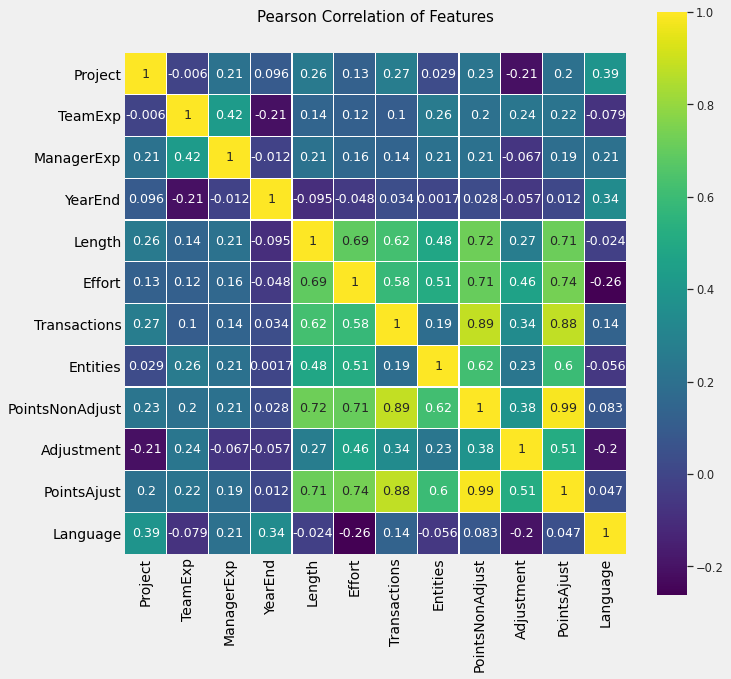

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [9]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [ ]:
res = pd.DataFrame(np.zeros((len(y_test), 1)))

LINEAR REGRESSION

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))
res['Linear'] = predictions

Mean Squared Error: 0.0063675856206004255
R^2 Score:  0.7553514928502694


LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True, alpha=0.00001)
lasso_reg.fit(X_train,y_train)
predictions =lasso_reg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))
res['Lasso'] = predictions

Mean Squared Error: 0.006367585961027412
R^2 Score:  0.7553514797707508


RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.00001)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))
res['Ridge'] = predictions

Mean Squared Error: 0.006367585631260765
R^2 Score:  0.7553514924406892


NameError: ignored

ELASTICNET


In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0, alpha=0.000001, max_iter=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))
res['ElasticNet'] = predictions

Mean Squared Error: 0.0063662751465139245
R^2 Score:  0.7554018424722491


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204250711.76998633, tolerance: 76655.55304
  positive)


GENERALISED LINEAR MODELS - POISSON REGRESSION


In [ ]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
predictions = poisson_training_results.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.02605286300061748
R^2 Score:  -0.0009750036900968428


GENERALISED LINEAR MODELS - GAMMA REGRESSION

In [ ]:
gamma_training_results = sm.GLM(y_train, X_train, family=sm.families.Gamma()).fit()
predictions = gamma_training_results.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))
res['Linear'] = predictions

Mean Squared Error: 0.05274397656878281
R^2 Score:  -1.0264721823208625


/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


GENERALISED LINEAR MODELS - GAUSSIAN REGRESSION

In [ ]:
gaussian_training_results = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit()
predictions = gaussian_training_results.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))
res['Gaussian'] = predictions

Mean Squared Error: 0.005004264313198634
R^2 Score:  0.8077315537547063


SUPPORT VECTOR REGRESSION

In [ ]:
parameters = parameters = [{'kernel': ['linear','rbf']}]

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
sv = LinearSVC.fit(X_train, y_train)
predictions = sv.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.007907893974224351
R^2 Score:  0.6961714265398582


MULTI LAYER PERCEPTRON REGRESSION

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=30000).fit(X_train, y_train)
predictions = regr.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.009224489580032766
R^2 Score:  0.6455866101474637


XGBOOST REGRESSION

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 10, alpha = 1, n_estimators = 10)
xg_reg.fit(X_train,y_train)
predictions = xg_reg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.02421103573682946
R^2 Score:  0.06978969699262783


DECISION TREE REGRESSION

In [14]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

cv_r2_scores_rf = cross_val_score(reg, X, y, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Mean Squared Error: 0.014430464142258435
R^2 Score:  0.44556827026248136
[-1.93848278 -0.20070392  0.15551657  0.56230796 -0.15981436]
Mean 5-Fold R Squared: -0.31623530695977486


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X_train, y_train)
gpr.score(X_test, y_test)
predictions = gpr.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.009289394540891343
R^2 Score:  0.6430929017426186
